# 1.1 学习get与post请求

1. 学习get与post请求，尝试使用requests或者是urllib用get方法向https://www.baidu.com/发出一个请求，并将其返回结果输出。

2. 如果是断开了网络，再发出申请，结果又是什么。了解申请返回的状态码。

3. 了解什么是请求头，如何添加请求头。

今天是爬虫学习第一天，首先学习get和post请求。get和post是http的两种请求方法，也是最长被用到的两种方法。
- get:从指定的资源请求数据
- post:向指定的资源提交要被处理的数据

## Get方法

查询字符串（名称/值对）是在 GET 请求的 URL 中发送的：

/test/demo_form.asp?name1=value1&name2=value2

- GET请求可被缓存
- GET请求保留在浏览器历史纪录中
- GET请求可被收藏为书签
- GET请求不应再处理敏感数据时使用
- GET请求有长度限制
- GET请求只应当用于取回数据

## POST 方法

查询字符串（名称/值对）是在POST请求的HTTP消息主体中发送的：

POST /test/demo_form.asp HTTP/1.1
Host: w3schools.com
name1=value1&name2=value2

- POST请求不会被缓存
- POST请求不会保留在浏览器历史纪录中
- POST不能被收藏为书签
- POST请求对数据长度没有要求

## Requests发送请求

使用Requests发送网络请求非常简单。

首先导入Requests模块

In [4]:
import requests

下面我们用get方法向https://www.baidu.com/ 发出一个请求，并将其返回结果输出。

In [5]:
r = requests.get('https://www.baidu.com/')

In [6]:
print(r)

<Response [200]>


这里的r是Response对象，我们可以从这个对象中获取所有我们想要的信息。

In [7]:
# 打印该输出url
print(r.url)

https://www.baidu.com/


In [8]:
r.encoding

'ISO-8859-1'

**注：当断开网络时，我们查看下返回结果**

In [18]:
requests.get('https://www.baidu.com/')

当断开网络时，请求报错。

ConnectionError: HTTPSConnectionPool(host='www.baidu.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CA7AB332B0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

## urllib发送请求

In [12]:
from urllib import request

r = request.urlopen('https://www.baidu.com/')
print(r.read())

b'<html>\r\n<head>\r\n\t<script>\r\n\t\tlocation.replace(location.href.replace("https://","http://"));\r\n\t</script>\r\n</head>\r\n<body>\r\n\t<noscript><meta http-equiv="refresh" content="0;url=http://www.baidu.com/"></noscript>\r\n</body>\r\n</html>'


当断开网络再发出请求时：

In [15]:
r = request.urlopen('https://www.baidu.com/')
print(r.read())

结果返回：URLError: <urlopen error [Errno 11001] getaddrinfo failed>

## http状态码

当浏览者访问一个网页时，浏览者的浏览器会向网页所在服务器发出请求。当浏览器接收并显示网页前，此网页所在的服务器会返回一个包含HTTP状态码的信息头（server header）用以响应浏览器的请求。

HTTP状态码的英文为HTTP Status Code。

下面是常见的HTTP状态码：

* 200：请求正常，服务器正常的返回数据。
* 301：永久重定向。比如在访问www.jingdong.com的时候会重定向到www.jd.com
* 302：临时重定向。比如在访问一个需要登陆的页面时，而此时没有登陆，那么就会重定向到登陆页面。
* 400：请求的url在服务器上找不到。换句话说就是请求url错误。
* 403：服务器拒绝访问，权限不够。
* 500：服务器内部错误，可能时服务器出现bug了。

## 请求头

请求头能告诉被请求的服务器需要传送什么样的格式的信息

请求头可以被定义为：被用于http请求中并且和请求主体无关的那一类`HTTP header`。某些请求头如`Accept`, `Accept-*`,  `If-*`允许执行条件请求。某些请求头如：`Cookie`, `User-Agen`t 和`Referer`描述了请求本身以确保服务端能返回正确的响应。

并非所有出现在请求中的`http`首部都属于请求头，例如在 POST请求中经常出现的`Content-Length`实际上是一个代表请求主体大小的`entity header`，虽然你也可以把它叫做请求头。

此外，CORS定义了一个叫做 `simple headers`的集合，它是请求头集合的一个子集。如果某次请求是只包含`simple headers`的话，则被认为是简单请求，不会触发请求预检（preflight）。

下面是一个http请求的请求头信息：

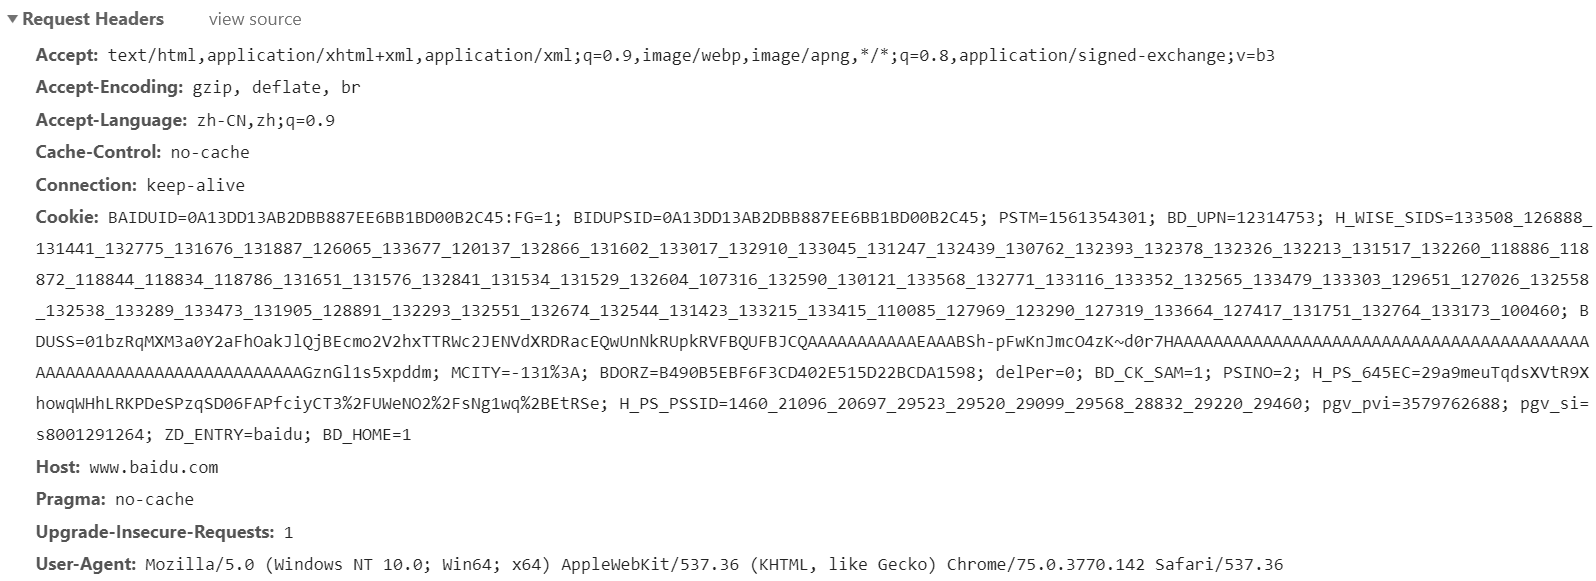

### 请求头常见参数：

在http协议中，向服务器发送一个请求，数据分三部分，第一个是把数据放在url中，第二个是把数据放在body中（在post请求中），第三个就是把数据放在head中，这里介绍在网络爬虫中经常会用到的一些请求头参数：

1. user-Agent：浏览器名称。这个在网络爬虫中经常被使用到。
2. Referer: 表明当前这个请求时从哪个url过来的，这个一般也可以用来做反爬虫技术。如果不是从指定页面过来的，那么就不做相关的响应。
3. Cookie: http协议是无状态的。也就是同一个人发送了两个请求，服务器没有能力知道这两个请求是否来自同一个人。因此这个时候就用cookie来做标识。一般如果想做登陆后才能访问的网站，那么就需要发送cookie信息了。

### 添加请求头

只需要将一个dict传递给headers参数便可以定制headers

In [16]:
url = 'https://api.github.com/some/endpoint'
headers = {'user-agent': 'my-app/0.0.1'}
r = requests.get(url, headers=headers)

# 1.2 正则表达式

1. 学习什么是正则表达式并尝试一些正则表达式并进行匹配。

2. 然后结合requests、re两者的内容爬取https://movie.douban.com/top250里的内容

3. 要求抓取名次、影片名称、年份、导演等字段。

### 正则表达式

正则表达式是一个特殊的字符序列，它能帮助你方便的检查一个字符串是否与某种模式匹配。

下面主要介绍Python中常用的正则表达式处理函数。

### re.match函数

re.match 尝试从字符串的起始位置匹配一个模式，如果不是起始位置匹配成功的话，match()就返回none。匹配成功re.match方法返回一个匹配的对象.

**函数语法：**

```
re.match(pattern,string,flags=0)
```

In [22]:
#!/usr/bin/python
import re
 
line = "Cats are smarter than dogs"
 
matchObj = re.match( r'(.*) are (.*?) .*', line, re.M|re.I)
 
if matchObj:
    print("matchObj.group() : ", matchObj.group())
    print("matchObj.group(1) : ", matchObj.group(1))
    print("matchObj.group(2) : ", matchObj.group(2))
else:
   print("No match!!")

matchObj.group() :  Cats are smarter than dogs
matchObj.group(1) :  Cats
matchObj.group(2) :  smarter


### re.search方法
re.search 扫描整个字符串并返回第一个成功的匹配。

**函数语法：**

re.search(pattern,string,flags=0)

In [20]:
#!/usr/bin/python
import re
 
line = "Cats are smarter than dogs";
 
searchObj = re.search( r'(.*) are (.*?) .*', line, re.M|re.I)
 
if searchObj:
    print("searchObj.group() :", searchObj.group())
    print("searchObj.group(1) : ", searchObj.group(1))
    print("searchObj.group(2) : ", searchObj.group(2))
else:
    print("Nothing found!!")

searchObj.group() : Cats are smarter than dogs
searchObj.group(1) :  Cats
searchObj.group(2) :  smarter


### re.match与re.search的区别

re.match只匹配字符串的开始，如果字符串开始不符合正则表达式，则匹配失败，函数返回None；而re.search匹配整个字符串，直到找到一个匹配。

### re.sub方法

re.sub用于替换字符串中的匹配项。

**函数语法：**

re.sub(pattern,repl,string,count=0,flags=0)

参数：

* pattern: 正则中的模式字符串
* repl: 替换的字符串，也可为一个函数
* string: 要被查找替换的原始字符串
* count: 模式匹配后替换的最大次数，默认0表示替换所有的匹配。

In [23]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-
 
import re
 
phone = "2004-959-559 # 这是一个国外电话号码"
 
# 删除字符串中的 Python注释 
num = re.sub(r'#.*$', "", phone)
print("电话号码是: ", num)
 
# 删除非数字(-)的字符串 
num = re.sub(r'\D', "", phone)
print("电话号码是 : ", num)

电话号码是:  2004-959-559 
电话号码是 :  2004959559


### re.compile方法

compile函数用于编译正则表达式，生成一个正则表达式对象，供match()和search()这两个函数使用。函数语法：

re.compile(pattern[,flags])

参数：

* pattern: 一个字符串形式的正则表达式
* flags可选，表示匹配模式，比如忽略大小写，多行模式等，具体参数为：
* re.I 忽略大小写
* re.L 表示特殊字符集 \w, \W, \b, \B, \s, \S 依赖于当前环境
* re.M 多行模式
* re.S 即为' . '并且包括换行符在内的任意字符（' . '不包括换行符）
* re.U 表示特殊字符集 \w, \W, \b, \B, \d, \D, \s, \S 依赖于 Unicode 字符属性数据库
* re.X 为了增加可读性，忽略空格和' # '后面的注释

### re.findall

在字符串中找到正则表达式所匹配的所有子串，并返回一个列表，如果没有找到匹配的，则返回空列表。

注意：match和search是匹配一次，findall匹配所有。

语法格式：
re.findall(string[,pos[,endpos]])

参数：
- string： 待匹配的字符串
- pos: 可选参数，指定字符串的起始位置，默认为0
- endpos可选参数，指定字符串的结束位置，默认为字符串的长度。

In [24]:
import re
 
pattern = re.compile(r'\d+')   # 查找数字
result1 = pattern.findall('runoob 123 google 456')
result2 = pattern.findall('run88oob123google456', 0, 10)
 
print(result1)
print(result2)

['123', '456']
['88', '12']


### re.finditer

和findall类似，在字符串中找到正则表达式所匹配的所有子串，并把它们作为一个迭代器返回。

re.finditer(pattern,string,flags=0)

In [25]:
import re
 
it = re.finditer(r"\d+","12a32bc43jf3") 
for match in it: 
    print (match.group() )

12
32
43
3


### re.split

split方法按照能够匹配的子串将字符串分割后返回列表，它的使用形式如下：

re.split(pattern,string[,maxsplit=0,flags=0])

In [26]:
import re
re.split('\W+', 'runoob, runoob, runoob.')

['runoob', 'runoob', 'runoob', '']

In [27]:
re.split('(\W+)', ' runoob, runoob, runoob.')

['', ' ', 'runoob', ', ', 'runoob', ', ', 'runoob', '.', '']

## 爬取豆瓣top250内容

首先打开网页：https://movie.douban.com/top250

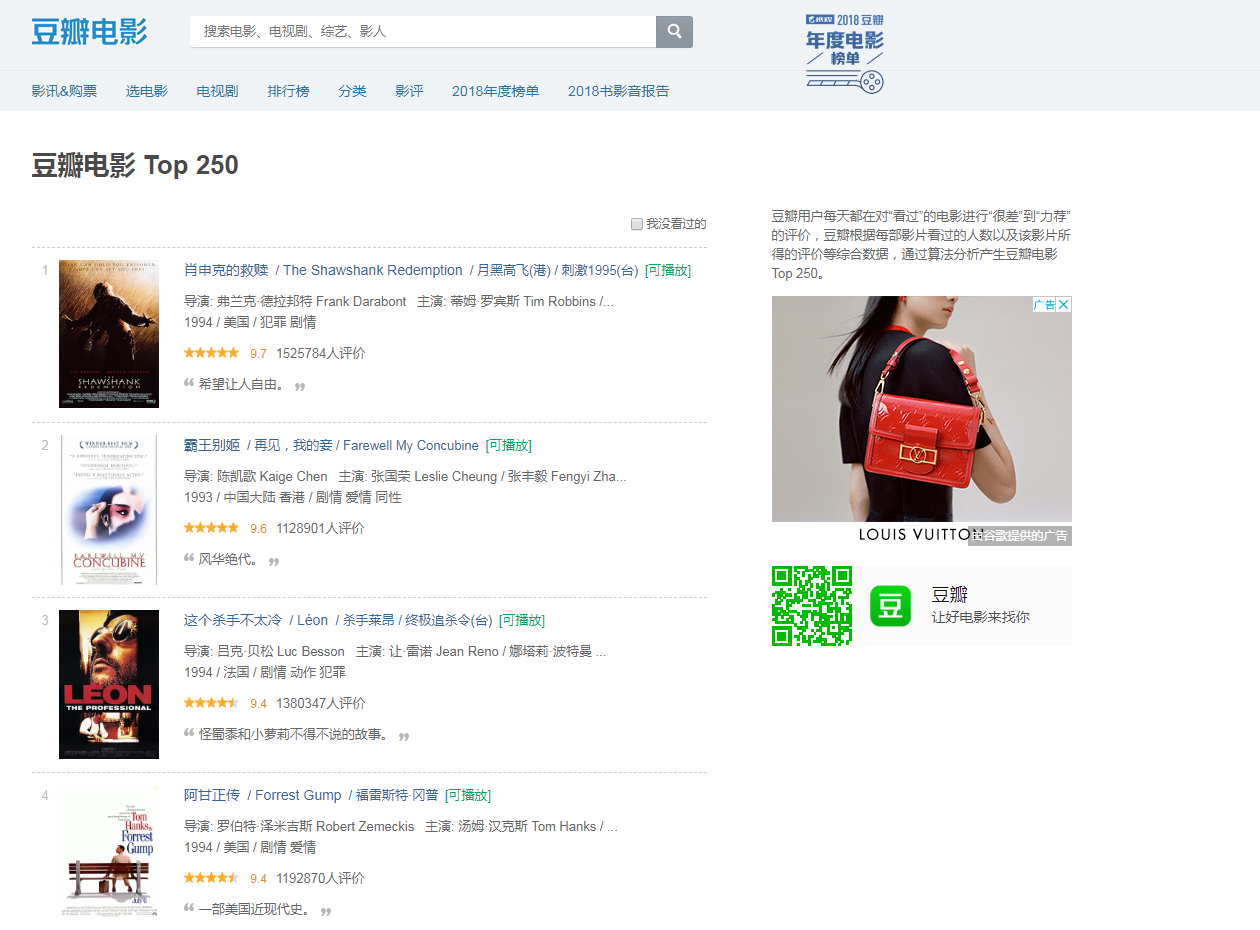

通过观察网页显示发现，页面是分页展示的，每页显示25个电影，对应的url参数发生改变。

第一页的url: https://movie.douban.com/top250?start=0&filter=

第二页的url: https://movie.douban.com/top250?start=25&filter=

第三页的url: https://movie.douban.com/top250?start=50&filter=

###  首先爬取第一页的内容

In [28]:
import requests

url = 'https://movie.douban.com/top250?start=0&filter='
kv = {
    'user-agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36'
}
response = requests.get(url, headers=kv)
if response.status_code == 200:
    html = response.text

print(html)


<!DOCTYPE html>
<html lang="zh-cmn-Hans" class="ua-windows ua-webkit">
<head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <meta name="renderer" content="webkit">
    <meta name="referrer" content="always">
    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />
    <title>
豆瓣电影 Top 250
</title>
    
    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />
    <meta http-equiv="Pragma" content="no-cache">
    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">
    
    <link rel="apple-touch-icon" href="https://img3.doubanio.com/f/movie/d59b2715fdea4968a450ee5f6c95c7d7a2030065/pics/movie/apple-touch-icon.png">
    <link href="https://img3.doubanio.com/f/shire/52c9997d6d42db58eab418e976a14d5f3eff981e/css/douban.css" rel="stylesheet" type="text/css">
    <link href="https://img3.doubanio.com/f/shire/ae3f5a3e3085968370b1fc63afcecb22d3284848/css/separation/_all.css" rel="stylesheet" type=

###  提取每部电影的信息

下图是一步电影在html网页中的显示，我们要从html中提取出名次、影片名称、年份、导演等字段.

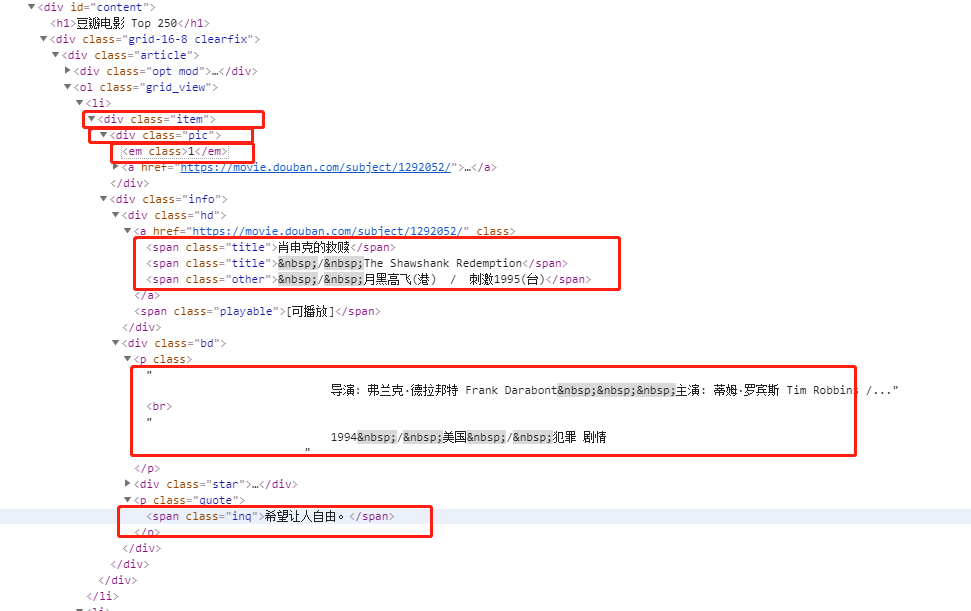
**提取电影的信息需要用到正则表达式**

通过上图可以看到每部电影的信息对应的源码是`<div class = 'item'`节点。我们先用正则表达式提取到每部电影的所有信息：
`regix = '<div class="item">'`
class为pic的节点下，包含了名次。提取名次的信息为：
`regix='<div class="item">.*?<div class="pic">.*?<em class="">(.*?)</em>'`

class为info的div标签中包含了电影的名字、导演和演员等信息，电影名字是在class为hd的div的节点内，提取电影名称的正则表达式为：

`regix = '<div class="item">.*?<div class="pic">.*?<em class="">(.*?)</em>.*?<div class="info">.*?<div class="hd">.*?class="title">(.*?)</span>.*?<div class="bd">.*?<p class="">(.*?)<br>(.*?)</p>'`

In [29]:
pattern = '<div class="item">.*?<div class="pic">.*?<em class="">(.*?)</em>.*?<div class="info">.*?<div class="hd">.*?class="title">(.*?)</span>.*?<div class="bd">.*?<p class="">(.*?)<br>(.*?)</p>'
items = re.findall(pattern, html,re.S)
for item in items:
    print(item)

('1', '肖申克的救赎', '\n                            导演: 弗兰克·德拉邦特 Frank Darabont&nbsp;&nbsp;&nbsp;主演: 蒂姆·罗宾斯 Tim Robbins /...', '\n                            1994&nbsp;/&nbsp;美国&nbsp;/&nbsp;犯罪 剧情\n                        ')
('2', '霸王别姬', '\n                            导演: 陈凯歌 Kaige Chen&nbsp;&nbsp;&nbsp;主演: 张国荣 Leslie Cheung / 张丰毅 Fengyi Zha...', '\n                            1993&nbsp;/&nbsp;中国大陆 香港&nbsp;/&nbsp;剧情 爱情 同性\n                        ')
('3', '这个杀手不太冷', '\n                            导演: 吕克·贝松 Luc Besson&nbsp;&nbsp;&nbsp;主演: 让·雷诺 Jean Reno / 娜塔莉·波特曼 ...', '\n                            1994&nbsp;/&nbsp;法国&nbsp;/&nbsp;剧情 动作 犯罪\n                        ')
('4', '阿甘正传', '\n                            导演: 罗伯特·泽米吉斯 Robert Zemeckis&nbsp;&nbsp;&nbsp;主演: 汤姆·汉克斯 Tom Hanks / ...', '\n                            1994&nbsp;/&nbsp;美国&nbsp;/&nbsp;剧情 爱情\n                        ')
('5', '美丽人生', '\n                            导演: 罗伯托·贝尼尼 Roberto Benigni&nbsp;&nbsp;&nbsp;主演: 罗伯托·贝尼尼 Roberto Ben

### 将电影信息格式化

In [31]:
for item in items:
    print({'排名': item[0],
            '电影名称':item[1],
            '导演和演员': re.sub('&nbsp;','',item[2].strip()),
            '年份':item[3].strip().split('&nbsp')[0]
                
    })

{'排名': '1', '电影名称': '肖申克的救赎', '导演和演员': '导演: 弗兰克·德拉邦特 Frank Darabont主演: 蒂姆·罗宾斯 Tim Robbins /...', '年份': '1994'}
{'排名': '2', '电影名称': '霸王别姬', '导演和演员': '导演: 陈凯歌 Kaige Chen主演: 张国荣 Leslie Cheung / 张丰毅 Fengyi Zha...', '年份': '1993'}
{'排名': '3', '电影名称': '这个杀手不太冷', '导演和演员': '导演: 吕克·贝松 Luc Besson主演: 让·雷诺 Jean Reno / 娜塔莉·波特曼 ...', '年份': '1994'}
{'排名': '4', '电影名称': '阿甘正传', '导演和演员': '导演: 罗伯特·泽米吉斯 Robert Zemeckis主演: 汤姆·汉克斯 Tom Hanks / ...', '年份': '1994'}
{'排名': '5', '电影名称': '美丽人生', '导演和演员': '导演: 罗伯托·贝尼尼 Roberto Benigni主演: 罗伯托·贝尼尼 Roberto Beni...', '年份': '1997'}
{'排名': '6', '电影名称': '千与千寻', '导演和演员': '导演: 宫崎骏 Hayao Miyazaki主演: 柊瑠美 Rumi Hîragi / 入野自由 Miy...', '年份': '2001'}
{'排名': '7', '电影名称': '泰坦尼克号', '导演和演员': '导演: 詹姆斯·卡梅隆 James Cameron主演: 莱昂纳多·迪卡普里奥 Leonardo...', '年份': '1997'}
{'排名': '8', '电影名称': '辛德勒的名单', '导演和演员': '导演: 史蒂文·斯皮尔伯格 Steven Spielberg主演: 连姆·尼森 Liam Neeson...', '年份': '1993'}
{'排名': '9', '电影名称': '盗梦空间', '导演和演员': '导演: 克里斯托弗·诺兰 Christopher Nolan主演: 莱昂纳多·迪卡普里奥 Le...', '年份': '2010'}
{'排名': '10', '

### 提取全部的top250

上面仅是提取第一页的电影信息，下面是提取全部top250的完整代码：

In [32]:
import requests
import re
import pandas as pd

def spider_page(url):
    kv = {
        'user-agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36'
    }
    response = requests.get(url, headers=kv)
    if response.status_code == 200:
        html = response.text
        pattern = '<div class="item">.*?<div class="pic">.*?<em class="">(.*?)</em>.*?<div class="info">.*?<div class="hd">.*?class="title">(.*?)</span>.*?<div class="bd">.*?<p class="">(.*?)<br>(.*?)</p>'
        items = re.findall(pattern, html,re.S)
        
        # 将电影信息格式化
        for item in items:
#             lst.extend([item[0],item[1],item[2].strip().split('&nbsp')[0],item[3].strip().split('&nbsp')[0]])
            yield {'排名': item[0],
                '电影名称':item[1],
                '导演和演员': re.sub('&nbsp;','',item[2].strip()),
                '年份':item[3].strip().split('&nbsp')[0]
                
            }
#         
    else:return None

    
def main():
    #url = 'https://movie.douban.com/top250'
    df = pd.DataFrame(columns = ['排名','电影名称','导演和演员','年份'])
    #lst = []
    for i in range(0,250,25):
        url = 'https://movie.douban.com/top250?start=' + str(i) + '&filter='
        for item in spider_page(url):
            dff = pd.DataFrame({'排名':item['排名'],'电影名称': item['电影名称'],'导演和演员':item['导演和演员'],'年份':item['年份']},index=[0])
            df = pd.concat([df,dff],axis=0,ignore_index = True)
    
    print(df.shape)
    print(df.head())
    
main()

(250, 4)
  排名     电影名称                                              导演和演员    年份
0  1   肖申克的救赎  导演: 弗兰克·德拉邦特 Frank Darabont主演: 蒂姆·罗宾斯 Tim Robb...  1994
1  2     霸王别姬  导演: 陈凯歌 Kaige Chen主演: 张国荣 Leslie Cheung / 张丰毅 ...  1993
2  3  这个杀手不太冷  导演: 吕克·贝松 Luc Besson主演: 让·雷诺 Jean Reno / 娜塔莉·波...  1994
3  4     阿甘正传  导演: 罗伯特·泽米吉斯 Robert Zemeckis主演: 汤姆·汉克斯 Tom Han...  1994
4  5     美丽人生  导演: 罗伯托·贝尼尼 Roberto Benigni主演: 罗伯托·贝尼尼 Roberto...  1997
